## 16. 군집화

### import

In [3]:
import pandas as pd
import numpy as np
import scipy
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
sklearn 0.21.3
matplotlib 3.5.3
seaborn 0.12.2


### 예제 데이터셋 준비

In [4]:
df_gene = pd.read_csv('data/gene.csv', index_col='patient')
df_gene.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer,train
patient,,,,,,,,,,,,,,,,,,,,,
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,ALL,True
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,ALL,True
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,ALL,True
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,ALL,True
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,ALL,True


In [5]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 1. 군집화(Clustering)
- 유사한 성질 을 가진 데이터 포인트들끼리 자동으로 묶어 주는 작업

$𝑋={𝐱_𝟏, …,𝐱_𝒏}⊂𝑹^𝒅$

$\cup_{𝑘=1}^𝐾C_k=𝑋, 𝐶_i\cap C_𝑗=∅(𝑖≠𝑗)$

각 데이터 포인트는 반드시 하나의 클러스터에만 속함

유사한 성질 $\Rightarrow$ 거리(Distance)

### 2. 거리 

#### 두 데이터 포인트의 차이를 수치화한 값
- 거리의 성질
| 성질 | 내용 |
| --- | --- |
| 비음성성 |$$𝑑(𝑥,𝑦)≥0$$|
| 동일성 |$$𝑑(𝑥,𝑦)=0⇔𝑥=𝑦$$|
| 대칭성 |$$𝑑(𝑥,𝑦)=𝑑(𝑦,𝑥)$$|
| 삼각부등식 |$$𝑑(𝑥,𝑧)≤𝑑(𝑥,𝑦)+𝑑(𝑦,𝑧)$$|
- 거리가 작을수록: 두 데이터 포인트는 유사함
- 거리가 클수록: 두 데이터 포인트는 차이가 남

#### 거리 척도(Metric)

- 범주형
| 거리 | 거리 함수 | 비고 |
| --- | --- | --- |
| 해밍 거리<br/>(Hamming Distance)| $$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} I(x_i \neq y_i)$$ | $$I(i) = \begin{cases} if\ i가\ True, 1 \\ if\ i가\ False, 0 \end{cases}$$ |
|자카드 거리<br/>(Jaccard Distance) |$$d(X, Y) = 1 - \frac{\vert X \cap Y \vert}{\vert X \cup Y \vert}$$| 다중 변수에서 사용 |


- 연속형

| 거리 | 함수 | 비고 |
|---|---|---|
| 유클리디언 거리<br>(Euclidean Distance) |$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$| |
| 맨하탄 거리<br>(Manhattan Distance) |$$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} \vert x_i - y_i \vert$$| |
| 민코프스키 거리<br>(Minkowski Distance) |$$d(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} \vert x_i - y_i \vert^p \right)^{1/p}$$| p=1 : 맨하탄 거리<br>p=2 : 유클리디언 거리 |
| 코사인 거리<br>(Cosine Distance) |$$d(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$$| 코사인유사도 : $$\frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$$|
| 마할라노비스 거리<br>(Mahalanobis Distance) |$$d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \Sigma^{-1} (\mathbf{x} - \mathbf{y})}$$|$$\Sigma$$: 공분산행렬 |

- 코사인 거리(Cosine Distance)

> $d(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$ 
>
> 벡터 간 방향만 비교하는 거리
> 
> 거리의 요건 중 삼각 부등식을 만족하지 않아 정확하게는 거리는 아님
> 
> 벡터의 스케일에 영향을 받지 않음
> 
> 고차원 희소 벡터에 적합


- 마할라노비스 거리(Mahalanobis Distance)
> $d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \Sigma^{-1} (\mathbf{x} - \mathbf{y})}$
> 
> 각 변수의 분산과 상관관계를 반영하여 거리 계산

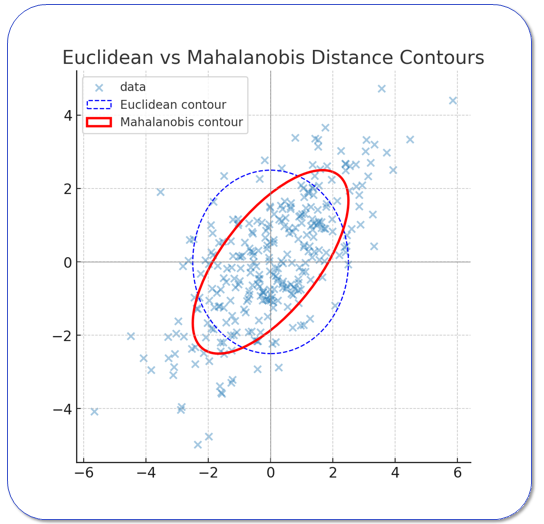

### 3. K-Means 군집화

- k 개의 중심점을 기준으로, 각 데이터 포인트를 가장 가까운 중심점에 할당하여 군집을 형성하는 방법

$\mathbf{\mu}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{\mu}_𝟏, \mathbf{\mu}_𝟐, …\mathbf{\mu}_𝒌\}$

$𝑐_𝑖=argmin_𝑘||\mathbf{𝐱}_𝐢−\mathbf{\mu}_k||^2$



#### 학습 $\mathbf{\mu}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{\mu}_𝟏, \mathbf{\mu}_𝟐, …\mathbf{\mu}_𝒌\}$

- 알고리즘
1. 중심점($\mathbf{\mu}$) 초기화
2. 군집 할당
3. 중심점 갱신 단계
> 중심점의 갱신 단계는
> $\text{𝐼𝑛𝑒𝑟𝑡𝑖𝑎}=\sum_{𝑘=1}^𝐾\sum_{𝑖∈𝐶}||\mathbf{x}_i−\mathbf{\mu}_𝒌||^2$ 을 낮추도록 되어 있음
4. 종료 조건이 충족될 때까지, 2 번 이동
> 중심점 갱신횟수 최대 도달 여부
> 
> 응집도(Inertia) 감소 임계점 ...

- 지역 최적점(Local Optima)이 다수 존재

> Greedy 알고리즘이므로 초기 중심점에 따라 결과가 다름
$\Rightarrow$ 다수의 수행 중에서 가장 좋은 응집도(Inertia)의 결과 채택


**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
4개의 중심을 가진 300 개의 2차원 데이터셋을 만들어 봅니다.
    
K-Means 군집화를 이 데이터셋으로 수행을 하고, 결과를 시각화시켜 봅니다.
    
</div>

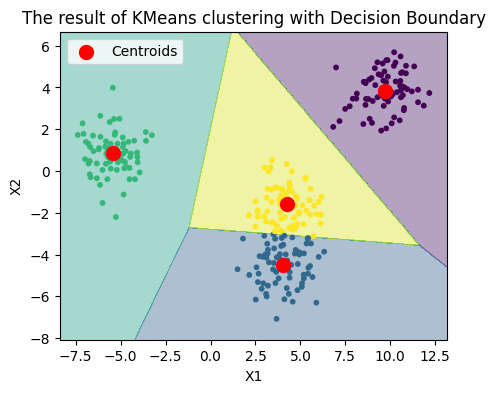

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 2차원 가상 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, random_state=123)

# KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# 결정 경계를 그리기 위한 메쉬그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 각 점에 대한 예측값 계산
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# 예측 결과를 시각화
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, c='red', label='Centroids')
plt.title('The result of KMeans clustering with Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone에서 변수 성별(Sex)을 제외한 변수들을 표준화하고 군집화 입력 변수로 합니다.

군집수를 3개로 하고, 군집화를 수행합니다.
    
</div>

In [7]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# 성별을 제외하여 입력 변수 리스트를 만듭니다.
X_cols = [i for i in df_abalone.columns if i not in ['Sex']]
# 표준화하여 결과를 DataFrame 형태로 만듭니다.
df_abalone_std = pd.DataFrame(
    StandardScaler().fit_transform(df_abalone[X_cols]), index=df_abalone.index, columns=X_cols
)

In [8]:
n_clusters = 3 # 군집수 입니다.
max_iter = 100 # 최대 중심점 이동수
sse_best = np.inf # 가장 좋은 SSE(Sum of Squared Error)
sse_best_hist = None # 가장 좋았을 때 SSE 기록
n_init = 100 # 초기화 수
sse_last = list()
for _ in range(n_init):
    sse_hist = list() # 중심 이동 때마다 SSE를 기록합니다.
    df_centroid = df_abalone_std.sample(n=n_clusters) # Forgy 방법으로 중심점을 초기회 합니다.
    for i in range(max_iter):
        dist = cdist(df_centroid, df_abalone_std) # 중심점과 데이터 포인트 간 거리를 구합니다.n_clusters×n 행렬 
        clu = np.argmin(dist, axis=0) # 가장 가까운 중심점의 인덱스를 구합니다.
        sse = np.sum(np.min(dist, axis=0) ** 2) # SSE를 구합니다.
        df_centroid = df_abalone_std.groupby(clu).mean() # 중심점을 갱신합니다.: 동일한 군집의 데이터 포인트들의 평균
        if len(sse_hist) > 0 and sse_hist[-1] <= sse: # 중심점이 더 이상 갱신 되지 않으면 종료합니다.
            break
        sse_hist.append(sse)
    if sse_best > sse:
        sse_best = sse
        sse_best_hist = sse_hist
    sse_last.append(sse)
sse_best

9922.77697994091

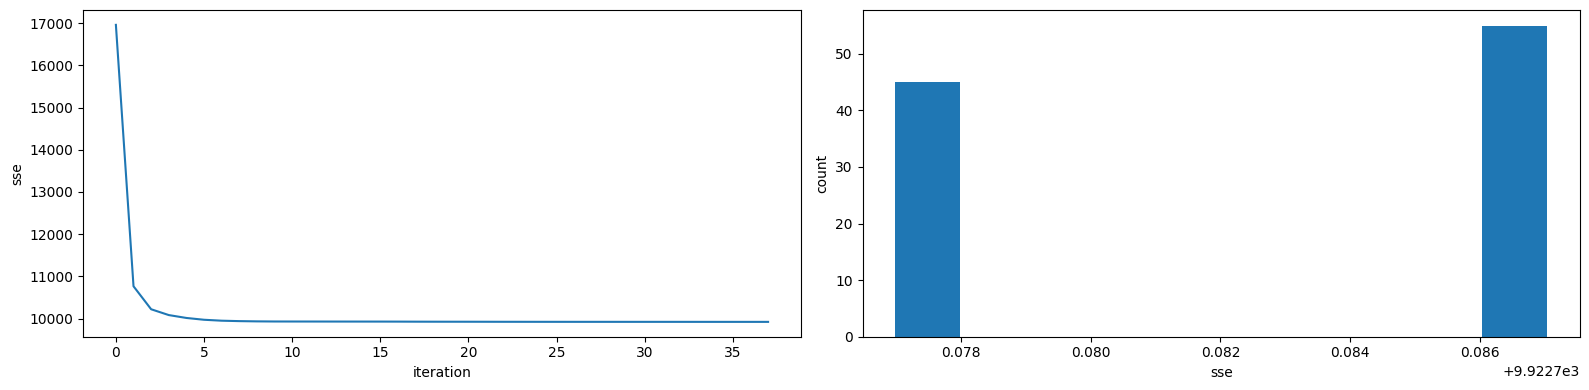

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(sse_best_hist)
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('sse')
axes[1].hist(sse_last)
axes[1].set_xlabel('sse')
axes[1].set_ylabel('count')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.cluster import KMeans
clu_km = KMeans(n_clusters=3, n_init=100, max_iter=100)
clu_km.fit(df_abalone_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
clu_km.inertia_

9922.780927338858

### 4. K-Medoids 군집화

- 데이터 포인트들 중에서 선택된 k 개의 대표점(medoid)을 기준으로, 가장 가까운 대표점의 군집으로 할당하는 군집화 방법

$\mathbf{m}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{m}_𝟏, \mathbf{m}_𝟐, …\mathbf{m}_𝒌\}$

$𝑐_𝑖=argmin_𝑘distance(\mathbf{𝐱}_𝐢−\mathbf{m}_k)$

- k-means 는 유클리디언 거리만 사용하지만
- k-medoids 는 거리 척도 선택 가능



#### 학습 $\mathbf{m}=\{\mathbf{m}_1, \mathbf{m}_2, ..., \mathbf{m}_2\}$

- 알고리즘
1. 대표점($m$) 초기화
2. 군집 할당
> $𝐶_𝑘=\{𝐱_𝑖│𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒(𝐱_𝐢,𝐦_𝒌)⁡\le𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒(𝐱_𝐢,𝒎_𝒋),\forall j\}$
3. 대표점 갱신 단계 $\mathbf{m}_k = \underset{\mathbf{x}_j \in C_k}{\text{argmin}} \sum_{\mathbf{x}_i \in C_k} distance(\mathbf{x}_i, \mathbf{x}_j)$
> $\text{TotalCost}=\sum_{𝑘=1}^𝐾\sum_{𝑖∈𝐶} distance(\mathbf{x}_i, \mathbf{\mu}_𝒌)$ 를 낮추는 것이 목표
4. 종료 조건이 충족될 때까지, 2 번 이동
> 대표점 갱신횟수 최대 도달 여부
> 
> 거리감소 임계점, ...

- 지역 최적점(Local Optima)이 다수 존재

> Greedy 알고리즘이므로 초기 중심점에 따라 결과가 다름
$\Rightarrow$ 다수의 수행 중에서 가장 좋은 TotalCost의 결과 채택


**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Ex.1에서 KMeans 대신에 K-Medoid로 수행합니다. K-medoid은 SSE 대신에 군집의 대표점(Medoid)과 소속 군집의 데이터포인트들과의 거리의합을 측정합니다.
    
</div>

In [ ]:
from scipy.spatial.distance import pdist, squareform
n_clusters = 3
max_iter = 100
dist_sum_best = np.inf
n_init = 100
dist_sum_last = list()
df_dist = pd.DataFrame(squareform(pdist(df_abalone_std)),index=df_abalone_std.index, columns=df_abalone_std.index)
for _ in range(n_init):
    dist_sum_hist = list()
    df_medoid = df_dist.sample(n=n_clusters)
    for i in range(max_iter):
        # 군집 할당 단계:  컬럼에는 각 데이터포인트의 인덱스이고, medoid와의 거리가 들어 있습니다.
        clu = df_medoid.idxmin(axis=0).values
        # 동일 군집에 해당하는 거리만을 가져와 합을 구합니다.
        dist_sum = df_medoid.apply(lambda x: x.loc[clu == x.name].sum(), axis=1).sum()
        # 각 군집에서 거리의 합이 최소인점으로 medoid를 갱신합니다. 
        df_medoid = df_dist.loc[
            df_dist.groupby(clu).apply(lambda x: x.loc[:, clu == x.name].sum(axis=1).idxmin())
        ]
        if len(dist_sum_hist) > 0 and dist_sum_hist[-1] <= dist_sum:
            break
        dist_sum_hist.append(dist_sum)
    if dist_sum_best > dist_sum:
        dist_sum_best = dist_sum
        dist_sum_best_hist = dist_sum_hist
    dist_sum_last.append(dist_sum)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(dist_sum_best_hist)
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('sum of distance')

axes[1].hist(dist_sum_last)
axes[1].set_xlabel('sum of distance')
axes[1].set_ylabel('count')
plt.tight_layout()
plt.show()

### 5. 가우시안 혼합 모델(Gaussian Mixture Model)

- 군집을 나타내는 가우시안 확률 분포와 가장 큰 밀도를 지닌 군집에 할당하는 군집화 방법

$𝐆𝐌𝐌=\{(𝜋_1,𝛍_1,𝚺_1),(𝜋_2,𝛍_2,𝚺_2), …,(𝜋_𝐾,𝛍_𝐾,𝚺_𝐾)\}$

$c_i = \underset{k \in GMM}{\text{argmax}} \frac{\pi_k N(\mathbf{x}_i | \boldsymbol{\mu}_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j N(\mathbf{x}_i | \boldsymbol{\mu}_j, \Sigma_j)}$

확률 밀도: $𝑝(\mathbf{𝐱})=\sum_{𝑘=1}^𝐾\pi_𝑘𝑁(𝐱|𝛍_𝑘,𝚺_𝑘)$

#### 다변량 가우시안 분포

$N(\mathbf{x}|\boldsymbol{\mu}, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \cdot \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^{\mathsf{T}}\Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu})\right)$

$\mathbf{x} \in R^d$ $\boldsymbol{\mu}_k \in R^d$:평균 벡터 $\Sigma_k \in R^{d \times d}$:공분산 행렬

#### 학습: 기대값 최대화(Expectation-Maximization) 알고리즘

$\theta = \{\theta_1, \theta_2, ..., \theta_k\} = \{(\pi_1, \boldsymbol{\mu}_1, \Sigma_1), (\pi_2, \boldsymbol{\mu}_2, \Sigma_2), ..., (\pi_K, \boldsymbol{\mu}_K, \Sigma_K)\}$ Where, $\sum_{k=1}^{K} \pi_k = 1$

> $p(Z = k)=\pi_k$
>
> $p(X = \mathbf{x}|Z = k) \sim N(\mathbf{\mu}_k, \mathbf{\Sigma_1})$

- 기대값(Expectation) $Q(\theta'|\theta) = E_{Z|X,\theta}[\log p(X, Z|\theta')]$

> $\mathbf{x}_i$가 서로 독립이라고 가정
>
> $Q(\theta'|\theta) = \sum_{i=1}^{N} \sum_{k=1}^{K} p(Z_i = k|X = \mathbf{x}_i, \theta) \log p(X = \mathbf{x}_i, Z_i = k|\theta')$
>
> $p(Z_i = k|X = \mathbf{x}_i, \theta) = \frac{P(Z_i = k, X = \mathbf{x}_i|\theta)}{P(X = \mathbf{x}_i|\theta)} = \frac{P(X = \mathbf{x}_i|Z_i = k, \theta)P(Z_i = k|\theta)}{\sum_{j=1}^{K} P(X = \mathbf{x}_i|Z_i = j, \theta)P(Z_i = j|\theta)} = \frac{\pi_k N(\mathbf{x}_i|\boldsymbol{\mu}_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j N(\mathbf{x}_i|\boldsymbol{\mu}_j, \Sigma_j)}$
> 
> $p(X = \mathbf{x}_i, Z_i = k|\theta') = p(X = \mathbf{x}_i|Z_i = k, \theta')p(Z_i = k|\theta') = \pi_k' N(\mathbf{x}_i|\boldsymbol{\mu}_k', \Sigma_k')$


- 최대화(Maximization)

> $\pi_k' = \underset{\pi_k'}{\text{argmax}} Q(\theta'|\theta)$ Where $\sum_{k=1}^{K} \pi_k' = 1$ | $\boldsymbol{\mu}_k' = \underset{\boldsymbol{\mu}_k'}{\text{argmax}} Q(\theta'|\theta)$ | $\Sigma_k' = \underset{\Sigma_k'}{\text{argmax}} Q(\theta'|\theta)$
>
> $\pi_k' = \frac{1}{N} \sum_{i=1}^{N} \gamma_{ik}$ | $\boldsymbol{\mu}_k' = \frac{\sum_{i=1}^{N} \gamma_{ik} \mathbf{x}_i}{\sum_{i=1}^{N} \gamma_{ik}}$ | $\Sigma_k' = \frac{\sum_{i=1}^{N} \gamma_{ik} (\mathbf{x}_i - \boldsymbol{\mu}_k)(\mathbf{x}_i - \boldsymbol{\mu}_k)^T}{\sum_{i=1}^{N} \gamma_{ik}}$

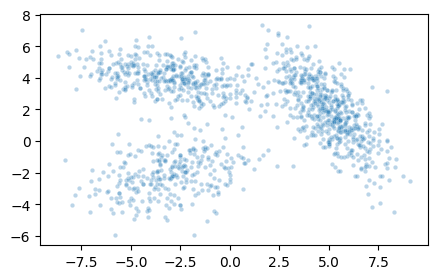

In [28]:
# multivariate_normal: 다변량 가우시안 분포의 기능을 담고 있는 모듈입니다.
from scipy.stats import multivariate_normal

plt.figure(figsize=(5, 3))

x1 = multivariate_normal.rvs(mean = (-3, -2), cov=[[4, 1], [1, 2]], size=300, random_state=123)
x2 = multivariate_normal.rvs(mean = (5, 2), cov=[[2, -2], [-2, 4]], size=550, random_state=123)
x3 = multivariate_normal.rvs(mean = (-3, 4), cov=[[5, -1], [-1, 1]], size=400, random_state=123)
X = np.vstack([x1, x2, x3])
sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.3, s=10)
plt.show()

In [29]:
n_mixture = 3
n = X.shape[0]
dim = X.shape[1]

np.random.seed(123)
m = np.random.uniform(size=(n_mixture, dim))
m = m - m.mean() + X.mean()

cov = [np.eye((dim)) for i in range(n_mixture)]
tau = np.ones(n_mixture) / n_mixture

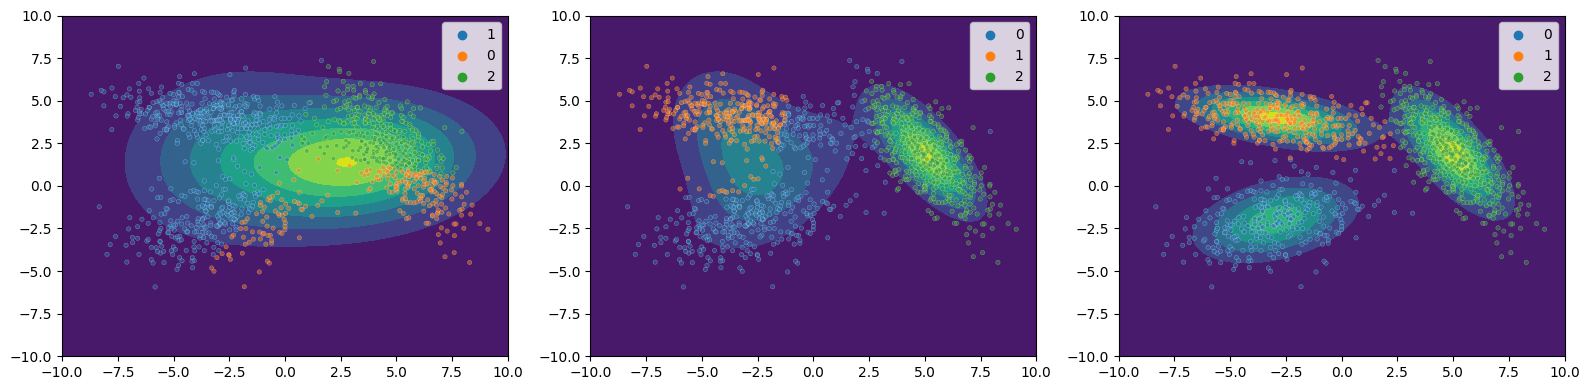

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
cnt = 0
for it in range(30):
    T = np.vstack([multivariate_normal.pdf(X, mean = m[i], cov = cov[i]) for i in range(n_mixture)]).T
    T = T / np.sum(T, axis=1, keepdims=True)

    T_sum = T.sum(axis=0)
    tau = T_sum / n
    T = T / T_sum
    m = np.array([np.dot(T[:, i], X) for i in range(n_mixture)]) 
    cov = list()
    for i in range(n_mixture):
        X_m = (X - m[i])
        cov.append(np.dot(X_m.T, T[:, i: i+1] * (X - m[i])))

    if it in [0, 15, 29]:
        # 2차원 다변량 가우시안 혼합 모델의 확률 밀도를 출력하기 위한
        # 출력 공간을 설정합니다.
        x = np.linspace(-10, 10, 100)
        y = np.linspace(-10, 10, 100)
        xx, yy = np.meshgrid(x, y)
        xy = np.vstack((xx.ravel(), yy.ravel())).T
        # 확률 밀도를 계산합니다.
        Z = np.mean([multivariate_normal.pdf(xy, mean=m[i], cov=cov[i]) for i in range(n_mixture)], axis=0)
        # 등고 그래프를 통해 확률 밀도를 출력합니다,.
        axes[cnt].contourf(xx, yy, Z.reshape(xx.shape), cmap='viridis')
        
        sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=0.5, s=10, hue=np.argmax(T, axis=1).astype(str), ax=axes[cnt])
        cnt += 1
plt.tight_layout()
plt.show()

분포 1: mean = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$, cov=$\begin{bmatrix} 4 & 1 \\ 1 & 2 \end{bmatrix}$

분포 2: mean = $\begin{bmatrix} 5 \\ 2 \end{bmatrix}, cov=\begin{bmatrix} 2 & -2 \\ -2 & 4 \end{bmatrix}$

분포 3: mean = $\begin{bmatrix} -3 \\ 4 \end{bmatrix}, cov=\begin{bmatrix} 5 & -1 \\ -1 & 1 \end{bmatrix}$

In [31]:
# 학습한 모수를 출력합니다.
for m_, cov_ in zip(m, cov):
    print("mean:", np.round(m_, 2)) 
    print("cov:")
    print(np.round(cov_, 2))

mean: [-2.96 -2.  ]
cov:
[[4.44 1.08]
 [1.08 2.04]]
mean: [-2.9   3.99]
cov:
[[ 5.57 -1.09]
 [-1.09  0.99]]
mean: [5.02 1.92]
cov:
[[ 1.95 -1.99]
 [-1.99  4.02]]


### 6. 군집수의 선택
#### 팔꿈치 방법(Elbow Method)
- 손실(우도)이 감소(증가)하다가 완만해지는 지점이 팔꿈치(Elbow)
- 꺾이는 지점의 군집수 선택

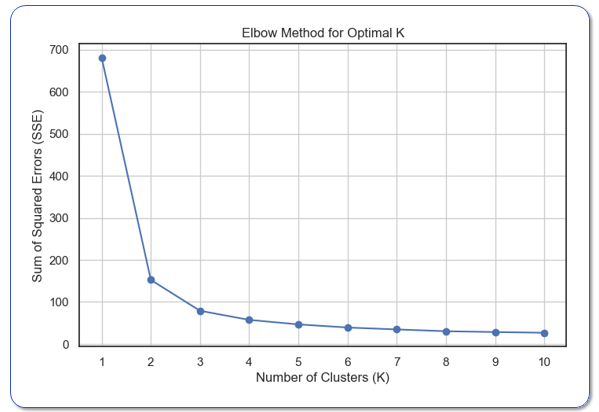

#### 실루엣 방법(Silhouette method)


- 실루엣 점수가 가장 높은 K 선택
- 하지만 실제 군집수와 불일치하는 경우가 많아 시각화나 도메인 지식 등을 함께 보고 결정

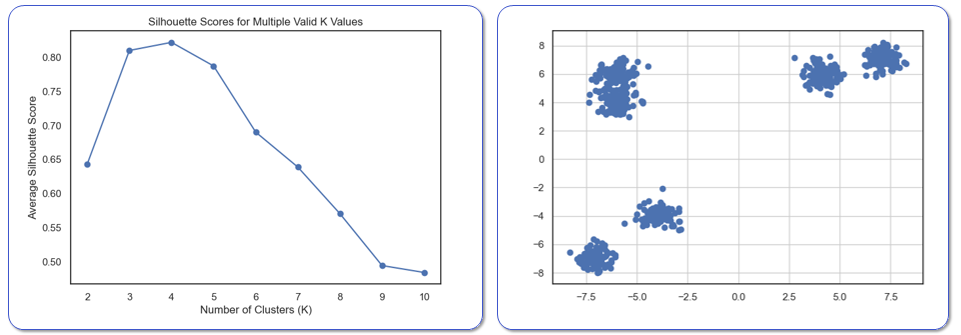

### 7. 계층적 군집화(Hierarchical Clustering)
- 군집 간의 유사도를 기반으로 군집을 결합 또는 분할하여 계층 구조의 군집을 형성하는 군집화 방법

|방법| 설명 |
| --- | --- |
| 병합형<br/>(Agglomerative) | Bottom-Up 방식 |
| 분할형<br/>(Divisive) | Top-Down 방식 |

▷ 실무에선 대부분 병합형(Agglomerative) 계층적 군집화 를 사용


#### 학습 방법: 병합형
- 1. 모든 데이터 포인트들을 하나의 군집으로 할당
- 2. 군집 간 결합 기준값(Linkage) 계산
- 4. 기준값이 최소인 두 군집을 결합
- 3. (최소 결합 기준값이 임계치를 넘었을 경우 종료)
- 5. 목표 군집수에 도달할 때 까지 2 부터 반복

| Linkage 방식 | 군집 A, B |
|---|---|
| Single |$$\underset{a_i \in A, b_i \in B}{\min} \quad dist(a_i, b_i)$$|
| Complete |$$\underset{a_i \in A, b_i \in B}{\max} \quad dist(a_i, b_i)$$|
| Average |$$\frac{1}{|A| \times |B|} \sum_{a_i \in A, b_i \in B} dist(a_i, b_i)$$|
| Ward |$$SSE(A \cup B) - SSE(A) - SSE(B)$$|

####  계층적 군집화 시각화(Dendrogram)

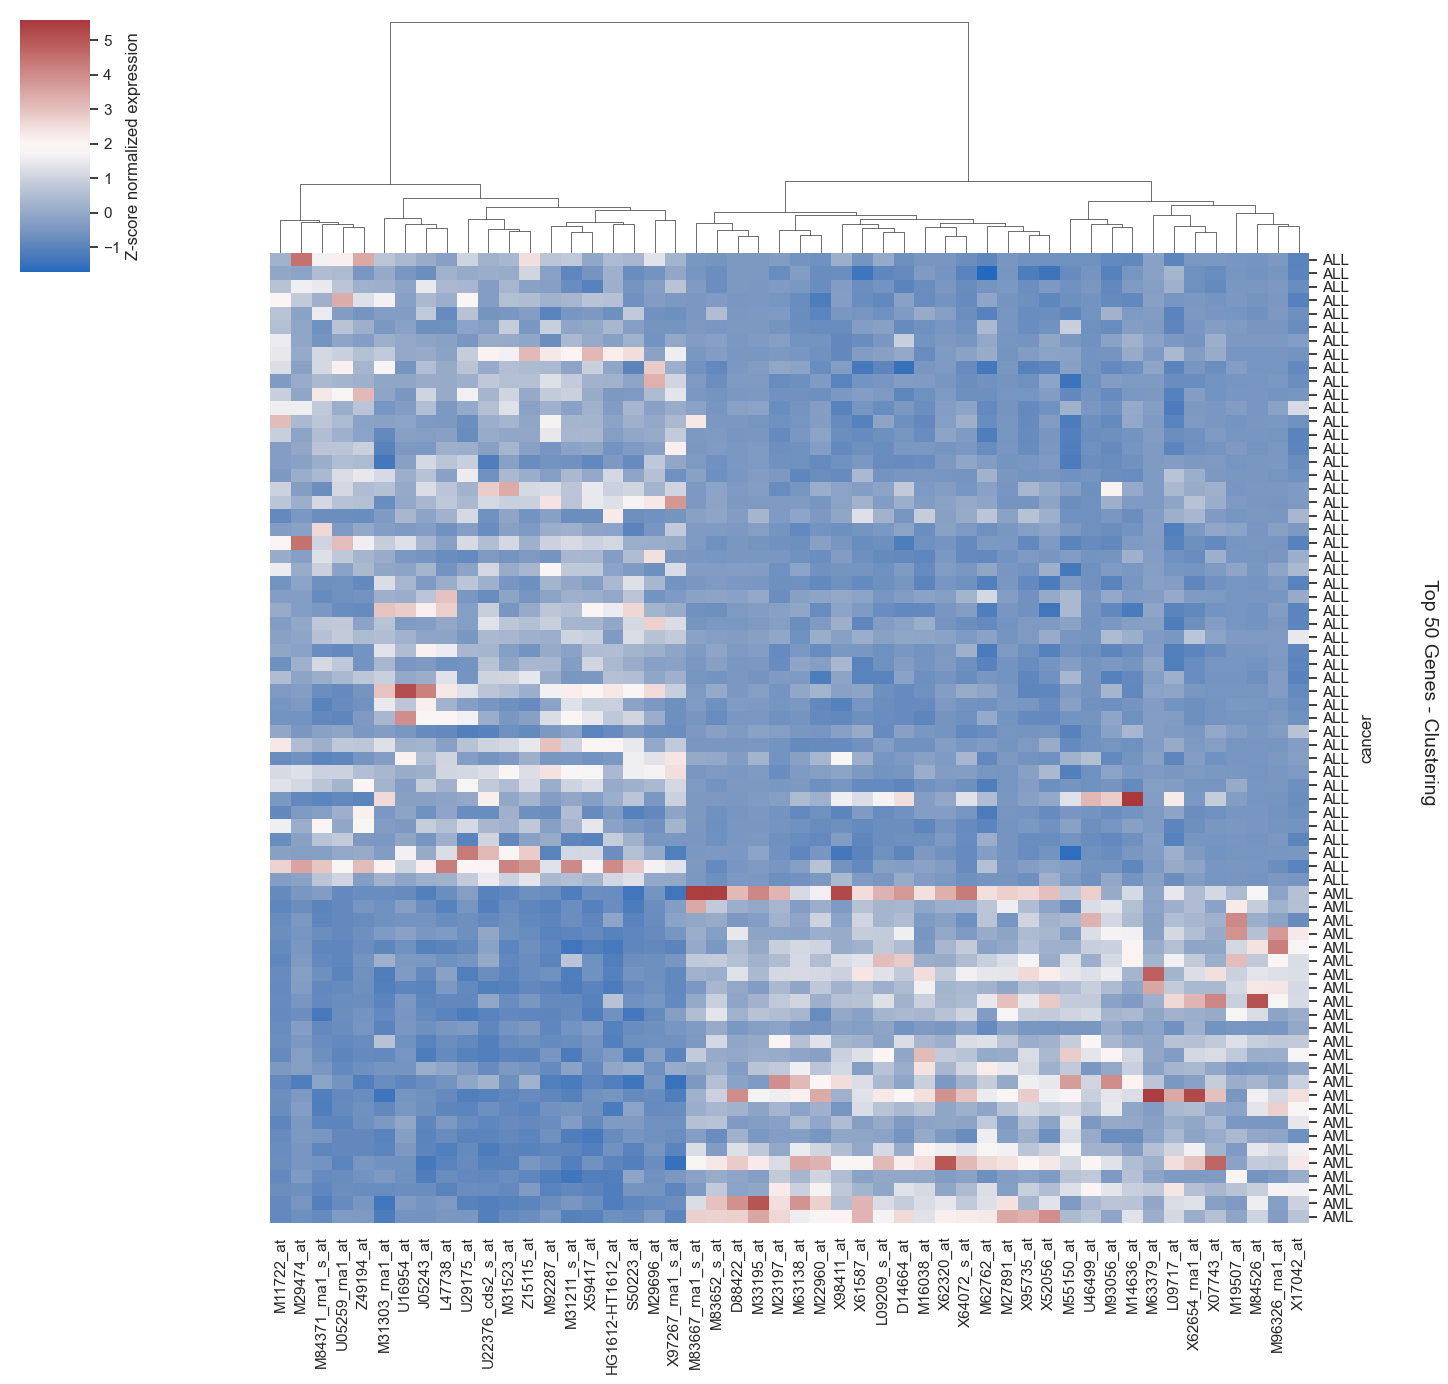

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_gene에서 train, cancer를 제외하고 표준화를 합니다.

표준화한 데이터프레임으로 평균 연결(average linkage) 방법으로 병합 군집화합니다.
    
</div>

In [12]:
from sklearn.preprocessing import StandardScaler
X_cols = [i for i in df_gene.columns if i not in ['train', 'cancer']]
df_gene_std = pd.DataFrame(StandardScaler().fit_transform(df_gene[X_cols]))
# 병합 군집화의 초기화 과정입니다.
# 현재 군집들의 결합 상태를 d_clu에 저장합니다
# d_clu의 키(key)에는 군집의 번호를, 값에는 소속 군집의 리스트를 저장합니다.
# 초기 상태는 각 데이터 포인트를 소속 군집으로 합니다.
d_clu = {i: [i] for i in range(len(df_gene_std))} 

from scipy.spatial.distance import pdist, squareform
# average linkage를 사용하므로 각 데이터 포인트간에 거리를 구하는데 사용합니다.
df_dist = pd.DataFrame(
    squareform(pdist(df_gene_std, metric='euclidean')), # 유클리디언 거리를 사용합니다.
    index= df_gene.index, columns = df_gene.index
)

In [13]:
import itertools, heapq
# 병합 군집화는 두 군집의 소속 데이터 포인트간에 최단 군집을 우선으로 결합 시킵니다.
# 현재 결합 대상이 되는 두 군집간의 거리를 저장해 두기 위한 공간입니다.
# 가장 거리가 가까운 두 군집을 뽑기 위한 자료 구조로 Heap을 사용합니다.
h = [] 
# 초기의 결합 후보가 되는 두 군집의 거리를 구하여 h에 넣습니다. 
for i, j in itertools.combinations(d_clu.keys(), 2):
    heapq.heappush(h, (df_dist.iloc[d_clu[i], d_clu[j]].mean().mean(), (i, j)))

초기 군집화 이후 결합이 되는 군집 정보를 **scipy.cluster.hierarchy.dendrogram**(군집 구조 출력 함수) 에서 사용하는 구조에 맞게 저장하여 군집 결과를 출력에 활용할 수 있도록 합니다.

**Z**: 결합 순서에 맞게,  (첫 번째 군집 인덱스, 두 번째 군집 인덱스, 두 군집간 거리, 결합 후 군집수) tuple을 리스트로 만듭니다.

> 군집 인덱스: 결합으로 생긴 군집을 전체 데이터수를 시작하여 군집이 만들어질 때마다 1씩 증가합니다.

scipy.cluster.hierarchy.linkage 매뉴얼 발췌
```
'Z[i, 0]' and 'Z[i, 1]' is given by 'Z[i, 2]'. The
fourth value 'Z[i, 3]' represents the number of original
observations in the newly formed cluster.
```

In [14]:
idx = len(df_gene) # 병합 되는 군집의 인덱스의 시작점입니다. 즉 n이후 인덱스는 결합으로 생긴 군집입니다. 
Z = list()
while len(h) > 0:
    criterion, (i, j) = heapq.heappop(h) # heap에서 기준에 부합하는 군집의 인덱스를 가져옵니다.
    if i not in d_clu or j not in d_clu: # 이미 결합이 된 경우에는 건너 뜁니다.
        continue
    new_clu = d_clu[i] + d_clu[j] # 결합 후 데이터 포인트의 인덱스 입니다. 
    del d_clu[i], d_clu[j] # 결합이 되어 새로운 군집이 된 경우는 결합 대상에서 제외합니다.
    # 새로운 군집과 다른 군집간의 average linkage를 계산하여 또 다른 결합 대상을 만듭니다.
    for k, v in d_clu.items():
        heapq.heappush(h, (df_dist.iloc[v, new_clu].mean().mean(), (k, idx))) 
    d_clu[idx] = new_clu # 새로운 군집을 결합 대상에 넣습니다.
    # (첫 번째 군집 인덱스, 두 번째 군집 인덱스, 두 군집간 거리, 결합 후 군집수)
    Z.append((i, j, criterion, len(new_clu)))
    idx += 1

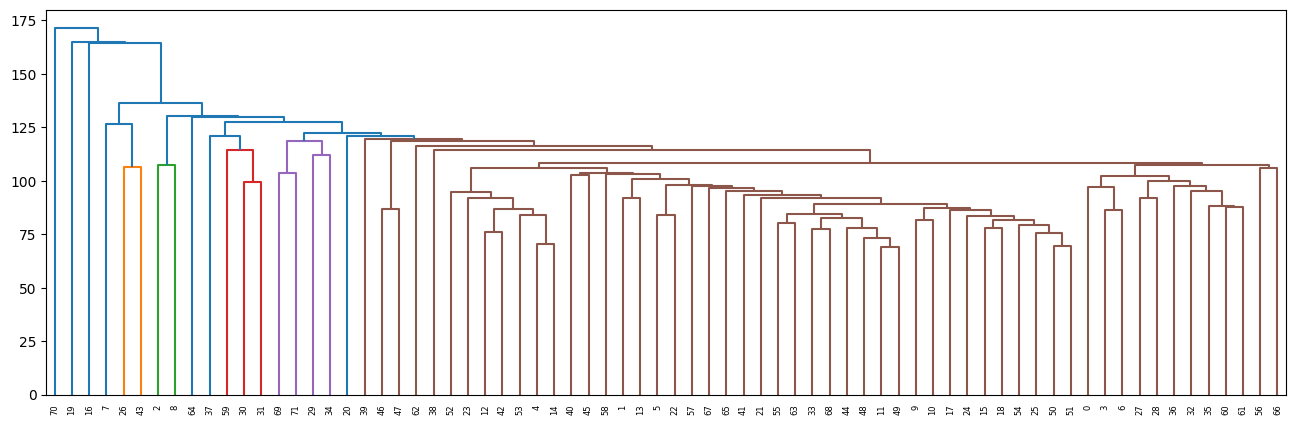

In [15]:
from scipy.cluster.hierarchy import dendrogram
# 군집화 결과를 시각화 합니다.
plt.figure(figsize=(16, 5))
dendrogram(Z)
plt.show()

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**[Ex.4]** 에서의 연결 방법을 와드 연결(ward linkage) 방법으로 병합 군집화합니다.

</div>

$\sum_{x \in A \cup B} ||x - \mu_{A \cup B}||^2 - \sum_{x \in A} ||x - \mu_A||^2 - \sum_{x \in B} ||x - \mu_B||^2$ 를 구하는 것은 

cost가 상당히 큰 연산입니다. 이를 효율화하기 위해서,

[Lance-Williams algorithm](https://en.wikipedia.org/wiki/Ward%27s_method)을 사용하여 구현합니다. 

scipy.stats.hierarchy.linkage 에서도 이 알고리즘에 기반하여 제작되었습니다. 

Lance-Williams algorithm은 squared Euclidean distance와, Euclidean distance를 사용하는데, 

Euclidean distance를 기준으로하여 구현해봅니다. (scipy.stats.hierarchy.linkage에서도 이를 기준으로 구현합니다)

In [16]:
import itertools, heapq
# 군집을 초기화합니다.
d_clu = {i: [i] for i in range(len(df_gene))} 
# 가장 거리가 가까운 두 군집을 뽑기 위한 자료 구조로 Heap을 사용합니다.
h = [] 
dist_dic = dict()
# Euclidean distance를 기준으로 하고 있어,
# 초기의 결합 후보가 되는 두 군집의 거리를 구하여 h에 넣습니다. 
for i, j in itertools.combinations(np.arange(len(df_gene)), 2):
    heapq.heappush(h, (df_dist.iloc[i, j],  (i, j)))
    dist_dic[(i, j)] = df_dist.iloc[i, j] ** 2

In [17]:
idx = len(df_gene) # 병합 되는 군집의 인덱스의 시작점입니다. 즉 n이후 인덱스는 결합으로 생긴 군집입니다. 
Z_ward = list()

def get_dist(a, b):
    return dist_dic[(a, b)] if a < b else dist_dic[(b, a)]

while len(h) > 0:
    criterion, (i, j) = heapq.heappop(h) # heap에서 결합 기준에 가장 부합하는 군집을 가져옵니다.
    if i not in d_clu or j not in d_clu: # 이미 결합이 된 경우에는 건너 뜁니다.
        continue
    n_i, n_j = len(d_clu[i]), len(d_clu[j])
    new_clu = d_clu[i] + d_clu[j] # 결합 후 데이터 포인트의 인덱스 입니다. 
    del d_clu[i], d_clu[j] # 결합이 되어 새로운 군집이 된 경우는 결합 대상에서 제외합니다.
    # 새로운 군집과 다른 군집간의 Minimum Increase in Variance(MIVAR)를 계산하여 또 다른 결합 대상을 만듭니다.
    for k, v in d_clu.items():
        n_k = len(v)
        T = n_i +  n_j + n_k
        # Lance-Williams algorithms을 이용하여 결합시 분산을 구하기 위한 euclidean 거리의 제곱
        d = (n_i + n_k) / T * get_dist(i, k) + (n_j + n_k) / T * get_dist(j, k) - (n_k) / T * get_dist(i, j)
        # 다음 군집의 criterion을 구하는데 사용하기 위해 저장합니다.
        dist_dic[(k, idx)] = d
        heapq.heappush(h, (d ** 0.5, (k, idx)))
    d_clu[idx] = new_clu # 새로운 군집을 결합 대상에 넣습니다.
    # (첫 번째 군집 인덱스, 두 번째 군집 인덱스, 두 군집간 거리, 결합 후 군집수)
    Z_ward.append((i, j, criterion, len(new_clu)))
    idx += 1

In [18]:
from scipy.cluster.hierarchy import linkage
Z2 = linkage(squareform(df_dist), 'average')

# 직접 구현해서 나온 결과와 비교합니다.
np.sum(abs(np.array(Z) - Z2) > 1e-12)

0

In [19]:
from scipy.cluster.hierarchy import linkage
Z2_ward = linkage(df_gene_std, 'ward')

# 직접 구현해서 나온 결과와 비교합니다.
np.sum(abs(np.array(Z_ward) - Z2_ward) > 1e-12)

0

In [20]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, t=2, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1], dtype=int32)

In [21]:
from sklearn.cluster import AgglomerativeClustering
clu_agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clu_agg.fit(df_gene_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [22]:
# 데이터 포인트의 소속 군집이 들어있습니다.
clu_agg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

### 8. DBSCAN
- 입실론 반경(Epsilon Radius): 이웃이 되기 위한 최소 반경
- 중심점 최소 이웃 수: 중심점이 되기 위한 최소 이웃의 수

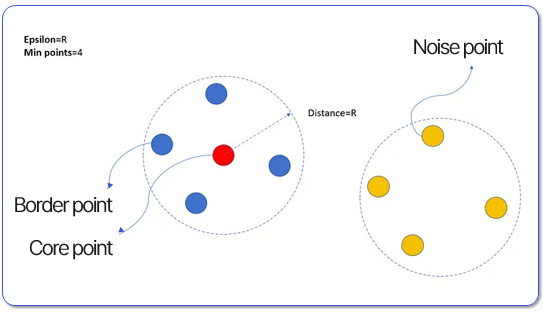

|   | 설명 |
| --- | --- |
| 중심점<br/>Core point | 입실론 반경 내의 이웃수가 중심점 최소 이웃수를 넘는 데이터 포인트 |
| 경계점<br/>Border point | 중심점 최소 이웃수는 넘지 않지만 중심점의 입실론 반경 내에 있는 데이터 포인트 |
| 잡음점<br/>Noise point | 중심점 과 경계점에 해당되지 않는 데이터 포인트 |


#### 학습 방법

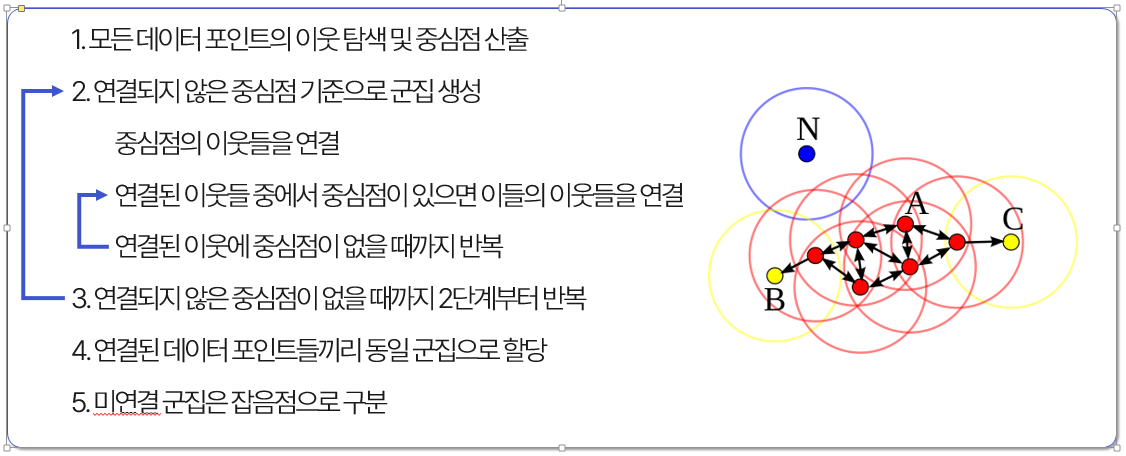
- 출처: https://en.wikipedia.org/wiki/DBSCAN

**[Ex 6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

2개의 고리 모양을 지닌 2 차원 데이터셋을 만들어,
    
DBSCAN으로 2개의 군집으로 나누어 봅니다.
    
</div>

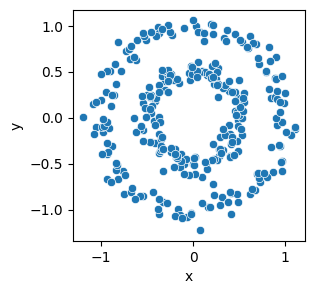

In [23]:
from sklearn.datasets import make_circles

X_circle, _ = make_circles(n_samples=300, factor=0.5, noise=0.07, random_state=123)

df_circle = pd.DataFrame(X_circle, columns=['x', 'y'])
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df_circle, x = 'x', y = 'y')
plt.show()

In [24]:
# 다음 구현은 pandas의 기능을 활용하여 위의 알고리즘을 더 간소화 시켰습니다.
# 큰 바탕은 같습니다.
eps_radius = 0.2
minPts = 5
df_dist = pd.DataFrame(squareform(pdist(df_circle)))
s_neighbors_list = df_dist.apply(
    lambda x:x.loc[(x.index != x.name) & (x <= eps_radius)].index.tolist(), 
axis=1)
s_status = s_neighbors_list.apply(lambda x: 0 if len(x) >= minPts else -1) # 0은 핵심 포인트, -1은 잡음 포인트 입니다.
s_status_init = s_status.copy()
C = 0
# 군집이 설정 된 것은 
while True:
    # 핵심 포인트 여부를 나타내는 boolean index를 만듭니다.
    is_core_point = s_status == 0
    # 핵심 포인트가 남아 있지 않으면 중단합니다.
    if is_core_point.sum() == 0:
        break
    # 핵심 포인트를 가져옵니다.
    s_neighbors = s_neighbors_list.loc[is_core_point].sample(n=1)
    C = C + 1
    # 가져온 핵심 포인트의 군집을 C로 설정합니다.
    s_status.loc[s_neighbors.index] = C
    s_neighbors = s_neighbors.iloc[0]
    while True:
        # 이웃의 상태를 가져옵니다.
        s_neighbors_status = s_status.loc[s_neighbors]
        # 잡음 포인트의  이웃을 가져옵니다.
        sub_noise = s_neighbors_status.loc[s_neighbors_status == -1].index
        # 잡음 포인트의 군집을 C로 설정합니다. 이 경우는 경계 포인트입니다.
        if len(sub_noise) > 0:
            s_status.loc[sub_noise] = C
        # 핵심 포인트인 이웃을 가져옵니다. 
        sub_core = s_neighbors_status.loc[s_neighbors_status == 0].index
        if len(sub_core) > 0:
            # 핵심 포인트의 군집을 C로 설정하고
            s_status.loc[sub_core] = C
            # 핵심 포인트들의 이웃을 가져옵니다.
            s_neighbors = s_neighbors_list.loc[sub_core].explode().unique()
        else:
            # 핵심 포인트가 없다면 멈춥니다.
            break

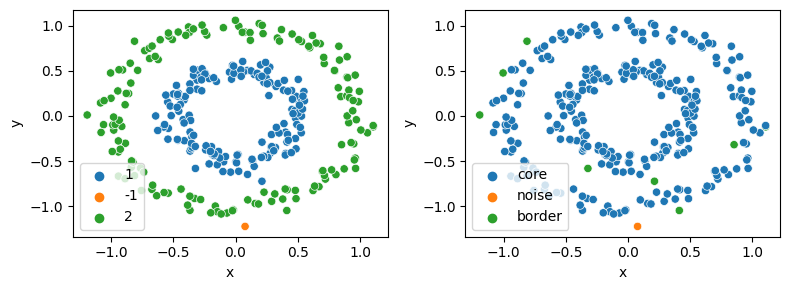

In [25]:
fig, axes= plt.subplots(1, 2, figsize=(8, 3))
sns.scatterplot(x = df_circle['x'],y = df_circle['y'], hue=s_status.astype('str'), ax=axes[0])
sns.scatterplot(x = df_circle['x'],y = df_circle['y'],
                hue=np.where((s_status != -1) & (s_status_init == -1), "border", np.where(s_status == -1, "noise", "core")), 
                ax=axes[1])
plt.tight_layout()
plt.show()

In [26]:
from sklearn.cluster import DBSCAN
clu_dbscan = DBSCAN(eps=eps_radius, min_samples=minPts + 1)
clu_dbscan.fit(df_circle)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

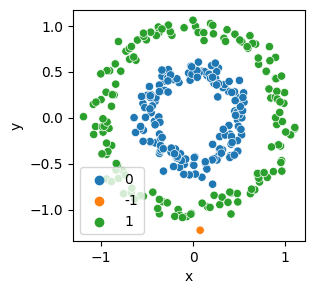

In [27]:
plt.figure(figsize=(3, 3))
sns.scatterplot(x = df_circle['x'],y = df_circle['y'],hue=clu_dbscan.labels_.astype('str'))
plt.show()

### 9. 정리

|   | 주요 특징 | 장점 | 단점 |
| --- | --- | --- | --- |
| K-means | 중심 기반 분할(Centroid-Based)<br/>유클리드 거리 사용<br/>구형 클러스터 가정 | 빠른 계산 속도<br/>간단한 구현 | 클러스터 수 지정 필요<br/>이상치에 민감<br>비구형 클러스터에는 부적합 |
| K-medoids | 중심이 실제 데이터 포인트<br/>거리 기반 | 이상치에 덜 민감<br/>다양한 거리 측정 가능 | 계산 비용이 큼<br/>클러스터 수 지정 필요 |
| 가우시안 혼합 모델<br/>(GMM) | 확률 기반 혼합 모델<br/>각 클러스터를 가우시안 분포로 가정 | 클러스터가 타원형일 때 효과적 | 초기값에 민감<br/>클러스터 수 지정 필요<br/>계산 복잡도가 높음 |
| 계층적 군집화 | 트리 형태로 구조 해석 가능 | 클러스터의 수를 미리 정할 필요 없음 | 계산 비용이 큼 |
| DBSCAN | 밀도 기반 클러스터링<br/>이상치 자동 감지<br/>클러스터 수 자동 결정 | 이상치를 감지할 수 있음<br/>복잡한 모양의 클러스터에 강함 | 밀도 파라미터 설정이 어려움<br/>밀도가 불균형한 데이터에 부적합 |


#### 군집화 결과 비교

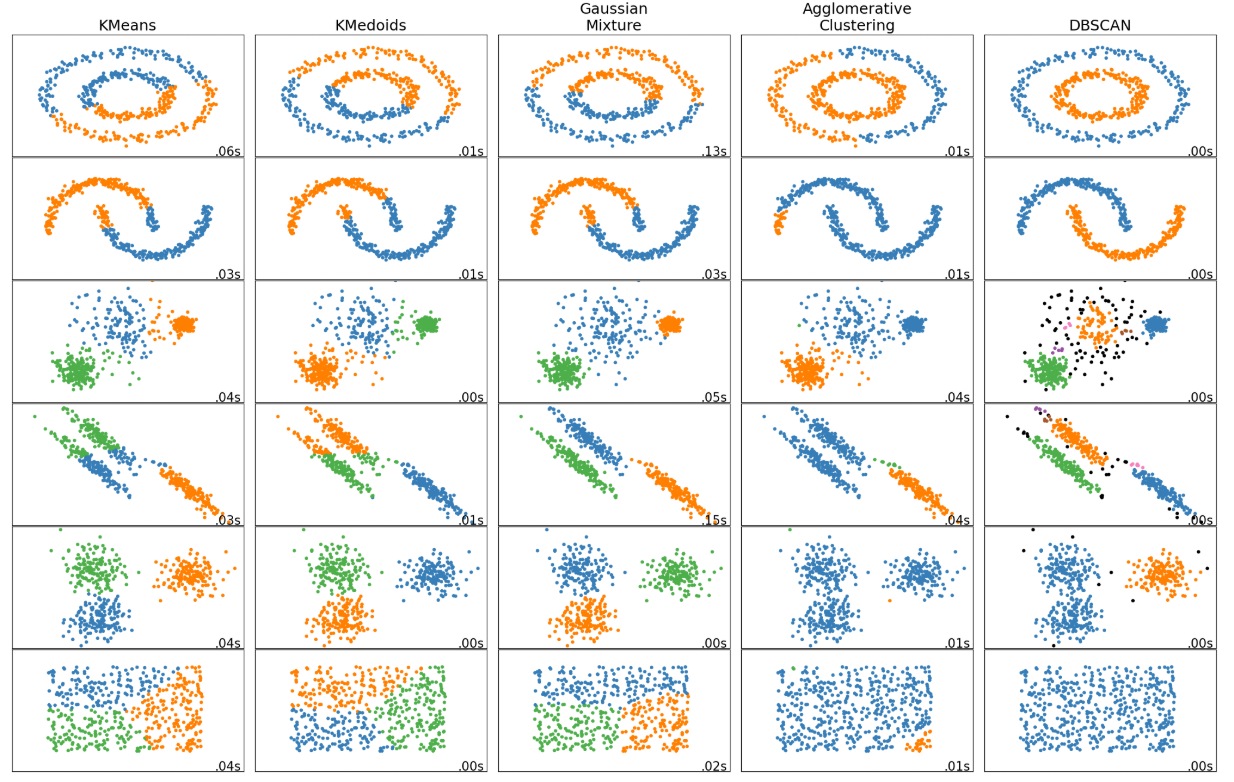